In [11]:
import pandas as pd
import numpy as np

Use pandas library to read data from csv file

In [12]:
psy = pd.read_csv('D:\\ProjectML\\Spam Comments Detection\\archive\Youtube01-Psy.csv')
katyperry = pd.read_csv('D:\\ProjectML\\Spam Comments Detection\\archive\Youtube02-KatyPerry.csv')
lmfao = pd.read_csv('D:\\ProjectML\\Spam Comments Detection\\archive\Youtube03-LMFAO.csv')
eminem = pd.read_csv('D:\\ProjectML\\Spam Comments Detection\\archive\Youtube04-Eminem.csv')
shakira  = pd.read_csv('D:\\ProjectML\\Spam Comments Detection\\archive\Youtube05-Shakira.csv')

<>:1: SyntaxWarning: invalid escape sequence '\Y'
<>:2: SyntaxWarning: invalid escape sequence '\Y'
<>:3: SyntaxWarning: invalid escape sequence '\Y'
<>:4: SyntaxWarning: invalid escape sequence '\Y'
<>:5: SyntaxWarning: invalid escape sequence '\Y'
<>:1: SyntaxWarning: invalid escape sequence '\Y'
<>:2: SyntaxWarning: invalid escape sequence '\Y'
<>:3: SyntaxWarning: invalid escape sequence '\Y'
<>:4: SyntaxWarning: invalid escape sequence '\Y'
<>:5: SyntaxWarning: invalid escape sequence '\Y'
C:\Users\Admin\AppData\Local\Temp\ipykernel_2280\2388625237.py:1: SyntaxWarning: invalid escape sequence '\Y'
  psy = pd.read_csv('D:\\ProjectML\\Spam Comments Detection\\archive\Youtube01-Psy.csv')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2280\2388625237.py:2: SyntaxWarning: invalid escape sequence '\Y'
  katyperry = pd.read_csv('D:\\ProjectML\\Spam Comments Detection\\archive\Youtube02-KatyPerry.csv')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2280\2388625237.py:3: SyntaxWarning: invalid e

Print out the size of the file

In [13]:
print(psy.shape)
print(katyperry.shape)
print(lmfao.shape)
print(eminem.shape)
print(shakira.shape)

(350, 5)
(350, 5)
(438, 5)
(448, 5)
(370, 5)


Join files into a single dataset

In [14]:
data = pd.concat([psy, katyperry, lmfao, eminem, shakira], ignore_index=True)
data.shape
print(data.sample(5))

                                       COMMENT_ID         AUTHOR  \
668             z12usroi1ovwtzud022kttmyetj2vng2n     Jacky Chan   
1853  _2viQ_Qnc68GD5OuwI5hh_dOADJdyjRye8XvH_ucDSk  jundi sahibol   
328         z13pitkr5prbgf3ja04cjjg4qme3txjpyqc0k   Yeung Marvin   
1919  _2viQ_Qnc68sxLpsBQ1cPk_LLH91SMsRav51KmhIoQw    Hidden Love   
1112          z12rtbaiolqywng1v23ispboqrnotriwk04    Lisa UKGirl   

                            DATE  \
668          2014-11-08T14:17:38   
1853  2013-09-07T05:55:49.698000   
328          2014-11-12T23:56:54   
1919  2013-07-30T11:22:57.091000   
1112  2014-07-26T18:46:28.500000   

                                                CONTENT  CLASS  
668   For latest movies 2014 please visit this site ...      1  
1853                                            awesome      0  
328   Haha its so funny to see the salt of westerner...      0  
1919                  Hi.Check out and share our songs.      1  
1112    Hey plz check out my music video. Thanks!

Get 2 columns whose values ​​are CONTENT and CLASS

In [15]:
data = data[["CONTENT", "CLASS"]]
print(data.sample(5))

                                                CONTENT  CLASS
977                Check out this playlist on YouTube:﻿      1
919         SUBSCRIBE MY CHANNEL PLEASE LOL PRO PLAYS)﻿      1
1144  Go check out my rapping video called Four Whee...      1
301   http://hackfbaccountlive.com/?ref=4436607  psy...      1
1836  Hey Music Fans I really appreciate any of you ...      1


0 is not spam and 1 is spam

In [16]:

data["CLASS"] = data["CLASS"].map({0: "Not Spam",
                                   1: "Spam "})
print(data.sample(5))

                                                CONTENT     CLASS
1566  Really good song .<br />you know love song song.﻿  Not Spam
1228  Check Out The New Hot Video By Dante B Called ...     Spam 
1704                Very pleasant to hear, haha, good.﻿  Not Spam
1048  Subscribe to my channel <br />Tweet &amp; Foll...     Spam 
689   PLEASE VOTE FOR ME FOR THE WET SEAL MODEL 2015...     Spam 


Use navie bayes bernoulli using sklearn library

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay

x = np.array(data["CONTENT"])
y = np.array(data["CLASS"])

cv = CountVectorizer()
x = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

Print out accuracy

In [25]:
ypred = model.predict(xtest)
accuracy_score(ytest, ypred)

0.8852040816326531

Prin confusion matrix

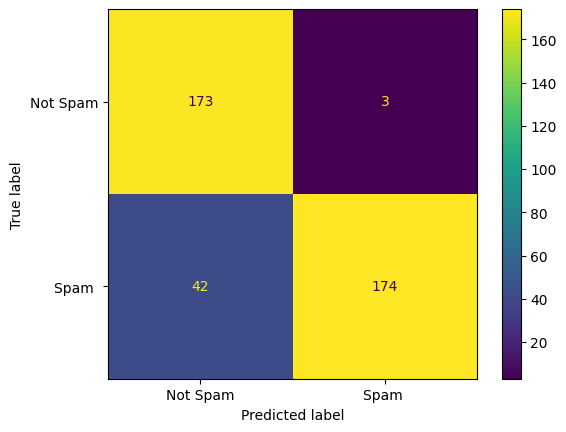

In [27]:
conf = confusion_matrix(ytest, ypred)
ConfusionMatrixDisplay(conf, display_labels=model.classes_).plot()

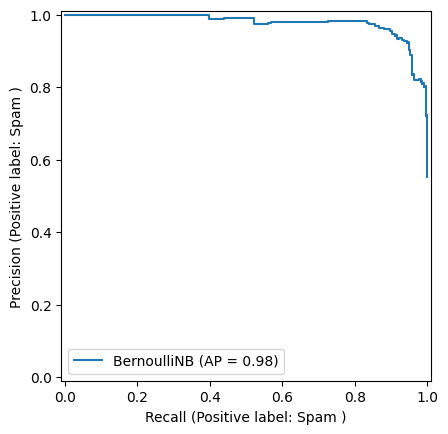

In [28]:
PrecisionRecallDisplay.from_estimator(model, xtest, ytest)

Test with some sentences

In [31]:
sample = "Huh, anyway check out this you[tube] channel: kobyoshi02" 
data = cv.transform([sample]).toarray()
print(model.predict(data))

['Spam ']


In [33]:
sample = "i turned it on mute as soon is i came on i just wanted to check the  views...﻿" 
data = cv.transform([sample]).toarray()
print(model.predict(data)) 

['Not Spam']


In [34]:
sample = "CHECK OUT MY CHANNEL" 
data = cv.transform([sample]).toarray()
print(model.predict(data)) 

['Spam ']
